# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_x = pd.read_csv('task_1/lm_scores/lm_X.csv')
df_y = pd.read_csv('task_1/lm_scores/lm_Y.csv')
df_z = pd.read_csv('task_1/lm_scores/lm_Z.csv')
df_test = pd.read_csv('task_1/mmlu_data/test.csv')

### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [3]:
# A

print('Lm_X data:')
print(df_x.result.value_counts())
print('-'*100)

print('Lm_Y data:')
print(df_y.result.value_counts())
print('-'*100)

print('Lm_Z data:')
print(df_z.result.value_counts())
print('-'*100)

Lm_X data:
result
A                                                                                    2733
A                                                                                    1657
B                                                                                    1412
Answer: A                                                                            1398
C                                                                                    1134
                                                                                     ... 
(–3, 2), so the answer is C                                                             1
sweet, so the answer is B                                                               1
remembering how to tie a tie, so the answer is B                                        1
anger, so the answer is A                                                               1
creating insurmountable obstacles to the founding of factions, so the answer is A 

In [4]:
# B

#"Answer: A/B/C/D"
#"...., so the answer is A/B/C/D"
# "A" vs "A " with the space at the end
# "Not Sure"
# "None of the above"

df_x.result.value_counts().index[:15]

Index(['A', 'A ', 'B', 'Answer: A', 'C', 'D', 'B ', 'Answer: B', 'C ',
       'Answer: D', 'D ', 'Answer: C', 'Not Sure', 'None of the above',
       'Wrong, Wrong, so the answer is A'],
      dtype='object', name='result')

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [5]:
# A
df_x_10 = df_x[df_x.result.str.len() < 10]
df_y_10 = df_y[df_y.result.str.len() < 10]
df_z_10 = df_z[df_z.result.str.len() < 10]

print('Before cleaning:')
print(df_x_10.result.value_counts())
print('-'*100)

#Since the data is not clean, we need to clean it first
# We will remove the "Not Sure" answer instead of assigning random values to it. This is feasible because the number of "Not Sure" answers is very low.

df_x_10 = df_x_10[df_x_10.result != 'Not Sure']
df_y_10 = df_y_10[df_y_10.result != 'Not Sure']
df_z_10 = df_z_10[df_z_10.result != 'Not Sure']

print('After cleaning:')
print(df_x_10.result.value_counts())

Before cleaning:
result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
D            1124
B             793
Answer: B     760
C             622
Answer: D     613
D             596
Answer: C     594
Not Sure       73
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
After cleaning:
result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
D            1124
B             793
Answer: B     760
C             622
Answer: D     613
D             596
Answer: C     594
Name: count, dtype: int64


In [6]:
# B
def clean_answer1(s, pattern=' '):
    #Remove any white spaces in the string
    return str(s).replace(pattern, '')

def clean_answer2(s, pattern=':'):
    #Remove any white spaces in the string
    s = str(s).split(pattern)
    return s[-1]

df_x_10['result'] = df_x_10['result'].apply(clean_answer1)
df_x_10['result'] = df_x_10['result'].apply(clean_answer2)
df_y_10['result'] = df_y_10['result'].apply(clean_answer1)
df_y_10['result'] = df_y_10['result'].apply(clean_answer2)
df_z_10['result'] = df_z_10['result'].apply(clean_answer1)
df_z_10['result'] = df_z_10['result'].apply(clean_answer2)

print('Before cleaning:')
print('x:',len(df_x), 'y:', len(df_y), 'z:',len(df_z))
print('After cleaning:')
print('x:',len(df_x_10), 'y:', len(df_y_10), 'z:', len(df_z_10))


Before cleaning:
x: 13882 y: 13978 z: 13923
After cleaning:
x: 13436 y: 13551 z: 12753


C. /Discuss:/

For the LM Z dataset, we observe that we had to drop 1170 datapoints, which is 8.8% of the dataset. This is a significant amount of data, especially since the data we dropped had an explanation for the answer that was given. This is crucial for Language Model tasks, as we are often looking to find explanations for the answer rather than just the answer. This lost data could be extracted by using better data pre-processing techniques, where we extracted the answers from the textual explanations given.

Moreover, completely ignoring "Not Sure" and "None of the above" might compromise the actual evaluation of the models as we are not taking into account effectively "wrong" answers.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [7]:
# A
df_x_join = pd.merge(df_x_10, df_test, on='question_id', how='inner', suffixes=('_df_x', '_df_test'))
df_y_join = pd.merge(df_y_10, df_test, on='question_id', how='inner', suffixes=('_df_y', '_df_test'))
df_z_join = pd.merge(df_z_10, df_test, on='question_id', how='inner', suffixes=('_df_z', '_df_test'))

In [8]:
# B
df_x_join['correct'] = df_x_join['result'] == df_x_join['answer']
df_y_join['correct'] = df_y_join['result'] == df_y_join['answer']
df_z_join['correct'] = df_z_join['result'] == df_z_join['answer']

print('Average Score for LM X:', 100*df_x_join.correct.mean().__round__(4), '%')
print('Average Score for LM Y:', 100*df_y_join.correct.mean().__round__(4), '%')
print('Average Score for LM Z:', 100*df_z_join.correct.mean().__round__(4), '%')

Average Score for LM X: 76.75 %
Average Score for LM Y: 74.58 %
Average Score for LM Z: 66.33 %


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [9]:
# A
print("{:25s}\t{:5s}\t{:5s}\t{:5s}".format("subject", "M1_X", "M1_Y", "M1_Z"))

for subject in df_x_join.subject.unique():
    filter_x = len(df_x_join[df_x_join.subject == subject])
    filter_y = len(df_y_join[df_y_join.subject == subject])
    filter_z = len(df_z_join[df_z_join.subject == subject])

    if abs(filter_x - filter_y) > 0.1 * filter_x or abs(filter_x - filter_y) > 0.1 * filter_y or abs(filter_x - filter_z) > 0.1 * filter_x or abs(filter_x - filter_z) > 0.1 * filter_z or abs(filter_y - filter_z) > 0.1 * filter_y or abs(filter_y - filter_z) > 0.1 * filter_z:
        print("{:25s}\t{:5d}\t{:5d}\t{:5d}".format(subject, filter_x, filter_y, filter_z))


subject                  	M1_X 	M1_Y 	M1_Z 
college chemistry        	   96	   98	   84
college computer science 	   97	   98	   84
computer security        	   95	   98	   87
formal logic             	  109	  123	  113
high school geography    	  195	  193	  176
logical fallacies        	  154	  136	  147
medical genetics         	   97	   98	   89
moral disputes           	  329	  304	  250
moral scenarios          	  737	  865	  774


In [10]:
# B

# For each subject which is imbalanced, we will take the minimum answered questions
# and sample a random number of questions from the other 2 such that it does not cross 10% of the minimum answered questions. 

import numpy as np

for subject in df_x_join.subject.unique():
    filter_x = len(df_x_join[df_x_join.subject == subject])
    filter_y = len(df_y_join[df_y_join.subject == subject])
    filter_z = len(df_z_join[df_z_join.subject == subject])

    if abs(filter_x - filter_y) > 0.1 * filter_x or abs(filter_x - filter_y) > 0.1 * filter_y or abs(filter_x - filter_z) > 0.1 * filter_x or abs(filter_x - filter_z) > 0.1 * filter_z or abs(filter_y - filter_z) > 0.1 * filter_y or abs(filter_y - filter_z) > 0.1 * filter_z:
        min_filter = min(filter_x, filter_y, filter_z)
        #max_filter = int(1.1 * min_filter)
        #new_x = df_x_join[df_x_join.subject == subject].sample(np.random.randint(min_filter, 1 + min(max_filter, filter_x)), replace=False)
        #new_y = df_y_join[df_y_join.subject == subject].sample(np.random.randint(min_filter, 1 + min(max_filter, filter_y)), replace=False)
        #new_z = df_z_join[df_z_join.subject == subject].sample(np.random.randint(min_filter, 1 + min(max_filter, filter_z)), replace=False)  
        new_x = df_x_join[df_x_join.subject == subject].sample(min_filter, replace=False)
        new_y = df_y_join[df_y_join.subject == subject].sample(min_filter, replace=False)
        new_z = df_z_join[df_z_join.subject == subject].sample(min_filter, replace=False)      
        df_x_join = pd.concat([df_x_join[df_x_join.subject != subject], new_x])
        df_y_join = pd.concat([df_y_join[df_y_join.subject != subject], new_y])
        df_z_join = pd.concat([df_z_join[df_z_join.subject != subject], new_z])

In [11]:
# C

df_x_join['correct'] = df_x_join['result'] == df_x_join['answer']
df_y_join['correct'] = df_y_join['result'] == df_y_join['answer']
df_z_join['correct'] = df_z_join['result'] == df_z_join['answer']

print('Average Score for LM X:', 100*df_x_join.correct.mean().__round__(5), '%')
print('Average Score for LM Y:', 100*df_y_join.correct.mean().__round__(4), '%')
print('Average Score for LM Z:', 100*df_z_join.correct.mean().__round__(4), '%')

Average Score for LM X: 76.685 %
Average Score for LM Y: 74.64 %
Average Score for LM Z: 66.29 %


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [12]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [13]:
def accuracy(df):
    return df[df.correct == True].correct.size / df.correct.size 

def std_error(df):
    n = df.shape[0]
    return np.std(df.correct) / np.sqrt(n)

mmlu_x = df_mmlu[df_mmlu.model_name == 'X']
mmlu_y = df_mmlu[df_mmlu.model_name == 'Y']
mmlu_z = df_mmlu[df_mmlu.model_name == 'Z']

other_x = df_other[df_other.model_name == 'X']
other_y = df_other[df_other.model_name == 'Y']
other_z = df_other[df_other.model_name == 'Z']

print("MMLU\nAccuracy x = {:.2f}\t||\tstd_error = {:.5f}\nAccuracy y = {:.2f}\t||\tstd_error = {:.5f}\nAccuracy z = {:.2f}\t||\tstd_error = {:.5f}\n".format(accuracy(mmlu_x), std_error(mmlu_x), accuracy(mmlu_y), std_error(mmlu_y), accuracy(mmlu_z), std_error(mmlu_z)))
print("Other\nAccuracy x = {:.2f}\t||\tstd_error = {:.5f}\nAccuracy y = {:.2f}\t||\tstd_error = {:.5f}\nAccuracy z = {:.2f}\t||\tstd_error = {:.5f}\n".format(accuracy(other_x), std_error(other_x), accuracy(other_y), std_error(other_y), accuracy(other_z), std_error(other_z)))

MMLU
Accuracy x = 0.74	||	std_error = 0.00404
Accuracy y = 0.76	||	std_error = 0.00394
Accuracy z = 0.66	||	std_error = 0.00439

Other
Accuracy x = 0.79	||	std_error = 0.00667
Accuracy y = 0.72	||	std_error = 0.00732
Accuracy z = 0.67	||	std_error = 0.00766



(0.5, 0.85)

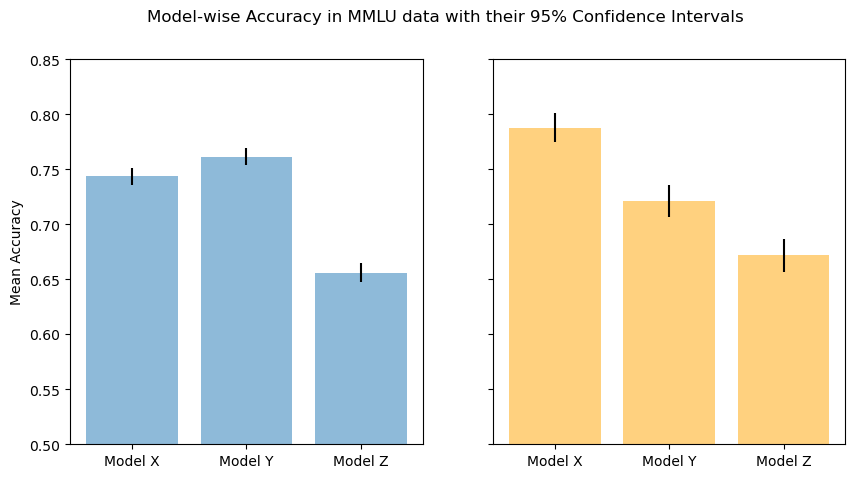

In [14]:
# B

mmlu_mean_x = df_mmlu[df_mmlu['model_name'] == 'X'].correct.mean()
mmlu_mean_y = df_mmlu[df_mmlu['model_name'] == 'Y'].correct.mean()
mmlu_mean_z = df_mmlu[df_mmlu['model_name'] == 'Z'].correct.mean()
means_mmlu = [mmlu_mean_x, mmlu_mean_y, mmlu_mean_z]
std_mmlu_x = df_mmlu[df_mmlu['model_name'] == 'X'].correct.std()
std_mmlu_y = df_mmlu[df_mmlu['model_name'] == 'Y'].correct.std()
std_mmlu_z = df_mmlu[df_mmlu['model_name'] == 'Z'].correct.std()
std_mmlu = [std_mmlu_x, std_mmlu_y, std_mmlu_z]
ci_mmlu_x = 1.96 * std_mmlu_x / np.sqrt(len(df_mmlu[df_mmlu['model_name'] == 'X']))
ci_mmlu_y = 1.96 * std_mmlu_y / np.sqrt(len(df_mmlu[df_mmlu['model_name'] == 'Y']))
ci_mmlu_z = 1.96 * std_mmlu_z / np.sqrt(len(df_mmlu[df_mmlu['model_name'] == 'Z']))
ci_mmlu = [ci_mmlu_x, ci_mmlu_y, ci_mmlu_z]

other_mean_x = df_other[df_other['model_name'] == 'X'].correct.mean()
other_mean_y = df_other[df_other['model_name'] == 'Y'].correct.mean()
other_mean_z = df_other[df_other['model_name'] == 'Z'].correct.mean()
means_other = [other_mean_x, other_mean_y, other_mean_z]
std_other_x = df_other[df_other['model_name'] == 'X'].correct.std()
std_other_y = df_other[df_other['model_name'] == 'Y'].correct.std()
std_other_z = df_other[df_other['model_name'] == 'Z'].correct.std()
std_other = [std_other_x, std_other_y, std_other_z]
ci_other_x = 1.96 * std_other_x / np.sqrt(len(df_other[df_other['model_name'] == 'X']))
ci_other_y = 1.96 * std_other_y / np.sqrt(len(df_other[df_other['model_name'] == 'Y']))
ci_other_z = 1.96 * std_other_z / np.sqrt(len(df_other[df_other['model_name'] == 'Z']))
ci_other = [ci_other_x, ci_other_y, ci_other_z]

# Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5),sharey=True, sharex=True)
fig.suptitle('Model-wise Accuracy in MMLU data with their 95% Confidence Intervals')

ax[0].bar([1,2,3], means_mmlu, yerr=ci_mmlu, align='center', alpha=0.5)
ax[0].set_xticks([1,2,3])
ax[0].set_xticklabels(['Model X','Model Y','Model Z'])
ax[0].set_ylim(0.5, 0.85)
ax[0].set_ylabel('Mean Accuracy')

ax[1].bar([1,2,3], means_other, yerr=ci_other, align='center', alpha=0.5, color='orange')
ax[1].set_ylim(0.5, 0.85)


C. /Discuss:/ 

We can confidently say that Models X and Y are better than Model Z. This is because the upper bound of the 95% confidence interval of model Z never crosses the 95% CI lower bound of either Models X and Y, thus mean that Model Z is statistically worse than the other two models. Between Models X and Y, we can not claim which of the two is better, because they have different relative performances on the two datasets as shown in the graphs.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

        MMLU Data  Other Data
answer                       
D            3739         641
C            3403         924
B            2943        1116
A            1611        1078


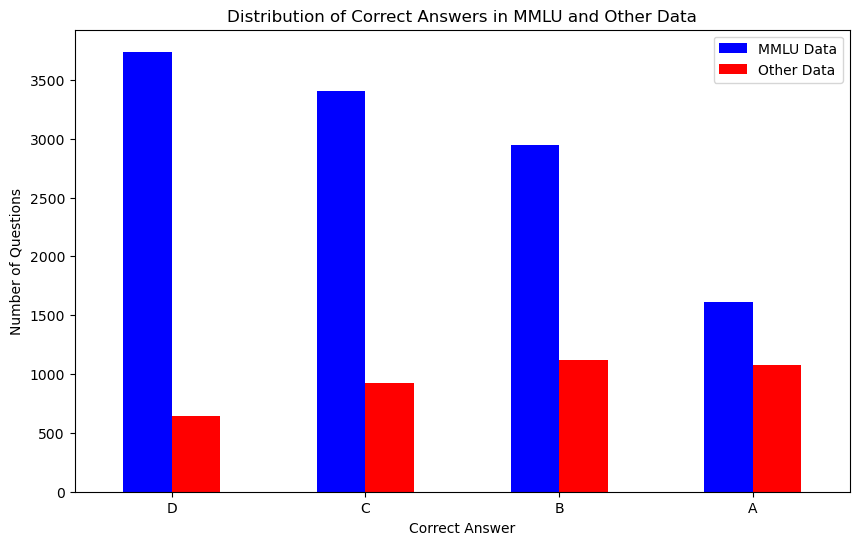

In [15]:
# A
#df_mmlu.drop_duplicates( subset='question_id' , inplace=False).answer.value_counts().plot(kind='barh')

df_dist = pd.concat([df_mmlu.drop_duplicates( subset='question_id' , inplace=False).answer.value_counts(), df_other.drop_duplicates( subset='question_id' , inplace=False).answer.value_counts()], axis=1)

df_dist.columns = ['MMLU Data', 'Other Data']

print(df_dist)

ax = df_dist.plot.bar(rot=0, color={"MMLU Data": "blue", "Other Data": "red"}, figsize=(10,6))
ax.set_xlabel('Correct Answer')
ax.set_ylabel('Number of Questions')
plt.title('Distribution of Correct Answers in MMLU and Other Data')
plt.show()

In [16]:
# B
from scipy.stats import chi2_contingency


# Null Hypothesis: The distribution of correct answers is independent of the dataset. Alternatively, the distribution of correct answers is the same in both datasets.
# Alternative Hypothesis: The distribution of correct answers is dependent on the dataset.

chi2, p, dof, ex = chi2_contingency(np.array(df_dist))
print('Chi-Square Statistic:', chi2)
print('P-Value:', p)
print('Degrees of Freedom:', dof)

# Since the P-value is less than 0.05, we reject the null hypothesis and conclude that the distribution of correct answers 
# is dependent on the dataset, and hence they differ for the MMLU dataset and the "Other dataset".

Chi-Square Statistic: 629.3958675644751
P-Value: 4.270849602795191e-136
Degrees of Freedom: 3


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [17]:
# A
print('Model X and MMLU Data:')
df_mmlu_x = df_mmlu[df_mmlu['model_name'] == 'X']
print('A: {:.3f}'.format(df_mmlu_x[df_mmlu_x['answer'] == 'A'].correct.mean()))
print('B: {:.3f}'.format(df_mmlu_x[df_mmlu_x['answer'] == 'B'].correct.mean()))
print('C: {:.3f}'.format(df_mmlu_x[df_mmlu_x['answer'] == 'C'].correct.mean()))
print('D: {:.3f}'.format(df_mmlu_x[df_mmlu_x['answer'] == 'D'].correct.mean()))

print('-'*100)
print('Model X and Other Data:')
df_other_x = df_other[df_other['model_name'] == 'X']
print('A: {:.3f}'.format(df_other_x[df_other_x['answer'] == 'A'].correct.mean()))
print('B: {:.3f}'.format(df_other_x[df_other_x['answer'] == 'B'].correct.mean()))
print('C: {:.3f}'.format(df_other_x[df_other_x['answer'] == 'C'].correct.mean()))
print('D: {:.3f}'.format(df_other_x[df_other_x['answer'] == 'D'].correct.mean()))

Model X and MMLU Data:
A: 0.973
B: 0.799
C: 0.708
D: 0.634
----------------------------------------------------------------------------------------------------
Model X and Other Data:
A: 0.974
B: 0.806
C: 0.676
D: 0.604


In [18]:
# B
from scipy.stats import ttest_ind

#H0: LM X's performance when the correct answer is "A" between the two datasets is the same
#H1: LM X's performance when the correct answer is "A" between the two datasets is different

tstat, pval = ttest_ind(df_mmlu_x[df_mmlu_x['answer'] == 'A'].correct, df_other_x[df_other_x['answer'] == 'A'].correct)
print('\nP-Value for A:', pval)



P-Value for A: 0.8332191972699248


Since the P-Value is greater then 0.05, we accept the null hypothesis H0: the performance of the model X when answer is "A" is the same in the 2 datasets

In [19]:
# C
#H0: LM X's performance when the correct answer is "A" vs LM X's performance when the correct answer is "C or D" is the same in mmlu

df_mmlu_x[df_mmlu_x['answer'] == 'A'].correct.value_counts()
df_mmlu_x[(df_mmlu_x['answer'] == 'C') | (df_mmlu_x['answer'] == 'D')].correct.value_counts()

df_other_x[df_other_x['answer'] == 'A'].correct.value_counts()
df_other_x[(df_other_x['answer'] == 'C') | (df_other_x['answer'] == 'D')].correct.value_counts()

tstat, pval = ttest_ind(df_mmlu_x[df_mmlu_x['answer'] == 'A'].correct, df_mmlu_x[(df_mmlu_x['answer'] == 'C') | (df_mmlu_x['answer'] == 'D')].correct)
print('P-Value for A vs C/D in MMLU Data:', pval)

tstat, pval = ttest_ind(df_other_x[df_other_x['answer'] == 'A'].correct, df_other_x[(df_other_x['answer'] == 'C') | (df_other_x['answer'] == 'D')].correct)
print('P-Value for A vs C/D in Other Data:', pval)

P-Value for A vs C/D in MMLU Data: 5.334906497224946e-139
P-Value for A vs C/D in Other Data: 5.900859805611251e-96


For both of the datasets we can refuse the null hypothesis, because in both of the cases the P-Value is lower than 0.05, meaning that the performance of the model X depends on the correct answer

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [20]:
# A

print('Mean Accuracy for Model X for "correct" answer A on MMLU Data', df_mmlu_x[df_mmlu_x['answer'] == 'A'].correct.mean().round(5))
print('Mean Accuracy for Model X for "correct" answer B on MMLU Data', df_mmlu_x[df_mmlu_x['answer'] == 'B'].correct.mean().round(5))
print('Mean Accuracy for Model X for "correct" answer C on MMLU Data', df_mmlu_x[df_mmlu_x['answer'] == 'C'].correct.mean().round(5))
print('Mean Accuracy for Model X for "correct" answer D on MMLU Data', df_mmlu_x[df_mmlu_x['answer'] == 'D'].correct.mean().round(5))
print('-'*100) 
print('Mean Accuracy for Model X for "correct" answer A on Other Data', df_other_x[df_other_x['answer'] == 'A'].correct.mean().round(5))
print('Mean Accuracy for Model X for "correct" answer B on Other Data', df_other_x[df_other_x['answer'] == 'B'].correct.mean().round(5))
print('Mean Accuracy for Model X for "correct" answer C on Other Data', df_other_x[df_other_x['answer'] == 'C'].correct.mean().round(5))
print('Mean Accuracy for Model X for "correct" answer D on Other Data', df_other_x[df_other_x['answer'] == 'D'].correct.mean().round(5))
print('-'*100)
df_mmlu_y = df_mmlu[df_mmlu['model_name'] == 'Y']
print('Mean Accuracy for Model Y for "correct" answer A on MMLU Data', df_mmlu_y[df_mmlu_y['answer'] == 'A'].correct.mean().round(5))
print('Mean Accuracy for Model Y for "correct" answer B on MMLU Data', df_mmlu_y[df_mmlu_y['answer'] == 'B'].correct.mean().round(5))
print('Mean Accuracy for Model Y for "correct" answer C on MMLU Data', df_mmlu_y[df_mmlu_y['answer'] == 'C'].correct.mean().round(5))
print('Mean Accuracy for Model Y for "correct" answer D on MMLU Data', df_mmlu_y[df_mmlu_y['answer'] == 'D'].correct.mean().round(5))
print('-'*100)
print('Mean Accuracy for Model Y for "correct" answer A on Other Data', df_other[df_other['model_name'] == 'Y'][df_other[df_other['model_name'] == 'Y']['answer'] == 'A'].correct.mean().round(5))
print('Mean Accuracy for Model Y for "correct" answer B on Other Data', df_other[df_other['model_name'] == 'Y'][df_other[df_other['model_name'] == 'Y']['answer'] == 'B'].correct.mean().round(5))
print('Mean Accuracy for Model Y for "correct" answer C on Other Data', df_other[df_other['model_name'] == 'Y'][df_other[df_other['model_name'] == 'Y']['answer'] == 'C'].correct.mean().round(5))
print('Mean Accuracy for Model Y for "correct" answer D on Other Data', df_other[df_other['model_name'] == 'Y'][df_other[df_other['model_name'] == 'Y']['answer'] == 'D'].correct.mean().round(5))
print('-'*100)
df_mmlu_z = df_mmlu[df_mmlu['model_name'] == 'Z']
print('Mean Accuracy for Model Z for "correct" answer A on MMLU Data', df_mmlu_z[df_mmlu_z['answer'] == 'A'].correct.mean().round(5))
print('Mean Accuracy for Model Z for "correct" answer B on MMLU Data', df_mmlu_z[df_mmlu_z['answer'] == 'B'].correct.mean().round(5))
print('Mean Accuracy for Model Z for "correct" answer C on MMLU Data', df_mmlu_z[df_mmlu_z['answer'] == 'C'].correct.mean().round(5))
print('Mean Accuracy for Model Z for "correct" answer D on MMLU Data', df_mmlu_z[df_mmlu_z['answer'] == 'D'].correct.mean().round(5))
print('-'*100)
print('Mean Accuracy for Model Z for "correct" answer A on Other Data', df_other[df_other['model_name'] == 'Z'][df_other[df_other['model_name'] == 'Z']['answer'] == 'A'].correct.mean().round(5))
print('Mean Accuracy for Model Z for "correct" answer B on Other Data', df_other[df_other['model_name'] == 'Z'][df_other[df_other['model_name'] == 'Z']['answer'] == 'B'].correct.mean().round(5))
print('Mean Accuracy for Model Z for "correct" answer C on Other Data', df_other[df_other['model_name'] == 'Z'][df_other[df_other['model_name'] == 'Z']['answer'] == 'C'].correct.mean().round(5))
print('Mean Accuracy for Model Z for "correct" answer D on Other Data', df_other[df_other['model_name'] == 'Z'][df_other[df_other['model_name'] == 'Z']['answer'] == 'D'].correct.mean().round(5))



Mean Accuracy for Model X for "correct" answer A on MMLU Data 0.97269
Mean Accuracy for Model X for "correct" answer B on MMLU Data 0.79918
Mean Accuracy for Model X for "correct" answer C on MMLU Data 0.7079
Mean Accuracy for Model X for "correct" answer D on MMLU Data 0.63359
----------------------------------------------------------------------------------------------------
Mean Accuracy for Model X for "correct" answer A on Other Data 0.97403
Mean Accuracy for Model X for "correct" answer B on Other Data 0.80645
Mean Accuracy for Model X for "correct" answer C on Other Data 0.67641
Mean Accuracy for Model X for "correct" answer D on Other Data 0.60374
----------------------------------------------------------------------------------------------------
Mean Accuracy for Model Y for "correct" answer A on MMLU Data 0.62384
Mean Accuracy for Model Y for "correct" answer B on MMLU Data 0.68807
Mean Accuracy for Model Y for "correct" answer C on MMLU Data 0.73347
Mean Accuracy for Model Y

(0.5, 1.0)

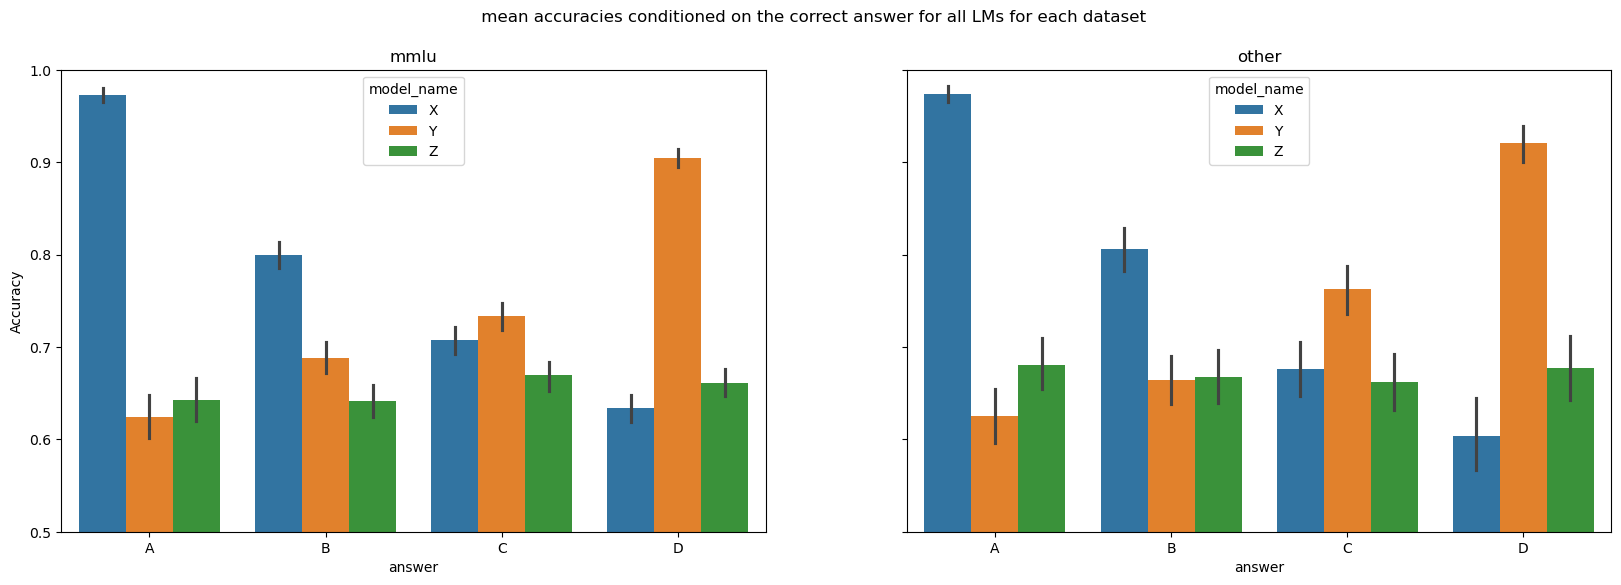

In [21]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 6),sharey = True , sharex=True)
fig.suptitle(' mean accuracies conditioned on the correct answer for all LMs for each dataset' )
order = ['A', 'B', 'C', 'D']
sns.barplot(x="answer", y="correct", data=df_mmlu, ax=ax[0], hue='model_name', legend=True, order=order)
sns.barplot(x="answer", y="correct", data=df_other, ax=ax[1], hue='model_name', legend=True, order=order)
ax[0].set_ylabel('Accuracy')  
ax[0].set_title('mmlu')  
ax[1].set_title('other')  
ax[1].tick_params()
plt.ylim(0.5, 1)

B. /Discuss:/

model_x has a better accuracy when the right answer is A in both other and mmlu, while model_y has a better accuracy when the right answer is D in both other and mmlu. model_z is more balanced in both datasets with an average accuracy lower than the other two models, as clearly shown in the plots.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

/Discuss:/

Re-testing the models on the permuted answers serves to verify that the models respond according to the content of the answers, independent of the letter corresponding to the right answer.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [22]:
df_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')
#I make sure that each row of the 2 dataframes has the same model_name and the same question_id
((df_mmlu['question_id']==df_mmlu_shuffle['question_id']) & (df_mmlu['model_name']==df_mmlu_shuffle['model_name'])).value_counts()


True    35088
Name: count, dtype: int64

In [23]:
#add column correct_shuffle and answer_shuffle and both_correct, and than group by model 
df_mmlu['correct_shuffle']=df_mmlu_shuffle['correct']
df_mmlu['answer_shuffle']=df_mmlu_shuffle['answer']
df_mmlu['both_correct']=df_mmlu['correct'] & df_mmlu['correct_shuffle'] 
df_mmlu_group_model=df_mmlu.groupby('model_name')

In [24]:
def compute_metric(model_name):
    df_model=df_mmlu[df_mmlu['model_name']==model_name]
    N=df_model.shape[0]
    metric = (1/N) * np.sum(df_model['correct'].astype(int) * df_model['correct_shuffle'].astype(int))
    return metric
print("metric for Ml_x: {:.3f}, metric for Ml_y: {:.3f} , metric for Ml_z: {:.3f}  ".format(compute_metric('X'), compute_metric('Y'), compute_metric('Z')))

metric for Ml_x: 0.588, metric for Ml_y: 0.572 , metric for Ml_z: 0.442  


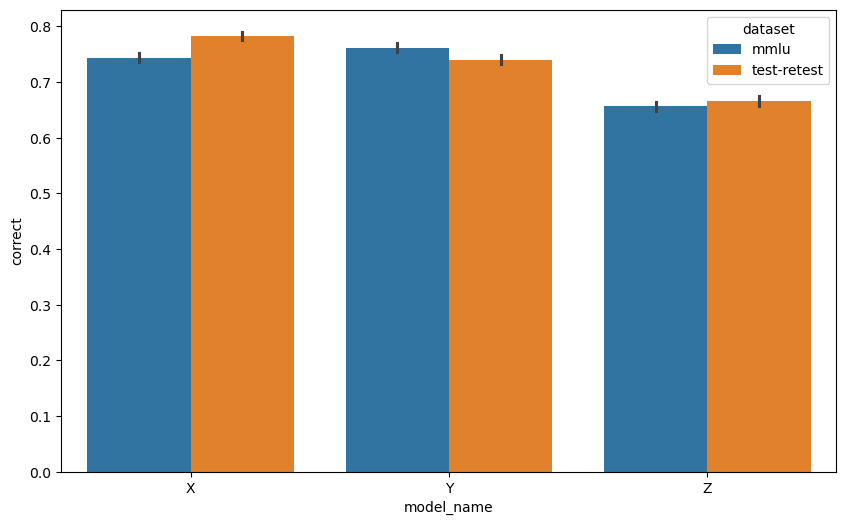

Text(0.5, 1.0, ' accuracy of lm_scores_mmlu.csv vs accuracy of test-retest scores for each language model.')

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
df_mmlu_shuffle['dataset']='test-retest'
df_mmlu['dataset']='mmlu'
df_to_show=pd.concat([df_mmlu, df_mmlu_shuffle], axis=0)
sns.barplot(x="model_name", ax=ax, y="correct",data=df_to_show, hue="dataset")
plt.show()
ax.set_title(" accuracy of lm_scores_mmlu.csv vs accuracy of test-retest scores for each language model.")

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [26]:
# A
print(f'Distribution of Answers for Model X and MMLU Data: {df_mmlu_x["result"].value_counts()}')
print(f'Accuracy of Model X on MMLU Data for Answer A: {df_mmlu_x[df_mmlu_x["result"] == "A"]["correct"].mean()}')
print(f'Accuracy of Model X on MMLU Data for Answer B: {df_mmlu_x[df_mmlu_x["result"] == "B"]["correct"].mean()}')
print(f'Accuracy of Model X on MMLU Data for Answer C: {df_mmlu_x[df_mmlu_x["result"] == "C"]["correct"].mean()}')
print(f'Accuracy of Model X on MMLU Data for Answer D: {df_mmlu_x[df_mmlu_x["result"] == "D"]["correct"].mean()}')
print('-'*100)
print(f'Distribution of Answers for Model X and Other Data: {df_other_x["result"].value_counts()}')
print(f'Accuracy of Model X on Other Data for Answer A: {df_other_x[df_other_x["result"] == "A"]["correct"].mean()}')
print(f'Accuracy of Model X on Other Data for Answer B: {df_other_x[df_other_x["result"] == "B"]["correct"].mean()}')
print(f'Accuracy of Model X on Other Data for Answer C: {df_other_x[df_other_x["result"] == "C"]["correct"].mean()}')
print(f'Accuracy of Model X on Other Data for Answer D: {df_other_x[df_other_x["result"] == "D"]["correct"].mean()}')
print('-'*100)


print(f'Distribution of Answers for Model Y and MMLU Data: {df_mmlu_y["result"].value_counts()}')
print(f'Accuracy of Model Y on MMLU Data for Answer A: {df_mmlu_y[df_mmlu_y["result"] == "A"]["correct"].mean()}')
print(f'Accuracy of Model Y on MMLU Data for Answer B: {df_mmlu_y[df_mmlu_y["result"] == "B"]["correct"].mean()}')
print(f'Accuracy of Model Y on MMLU Data for Answer C: {df_mmlu_y[df_mmlu_y["result"] == "C"]["correct"].mean()}')
print(f'Accuracy of Model Y on MMLU Data for Answer D: {df_mmlu_y[df_mmlu_y["result"] == "D"]["correct"].mean()}')
print('-'*100)
print(f'Distribution of Answers for Model Y and Other Data: {df_other[df_other["model_name"] == "Y"]["result"].value_counts()}')
df_other_y = df_other[df_other["model_name"] == "Y"]
print(f'Accuracy of Model Y on Other Data for Answer A: {df_other_y[df_other_y["result"] == "A"]["correct"].mean()}')
print(f'Accuracy of Model Y on Other Data for Answer B: {df_other_y[df_other_y["result"] == "B"]["correct"].mean()}')
print(f'Accuracy of Model Y on Other Data for Answer C: {df_other_y[df_other_y["result"] == "C"]["correct"].mean()}')
print(f'Accuracy of Model Y on Other Data for Answer D: {df_other_y[df_other_y["result"] == "D"]["correct"].mean()}')
print('-'*100)


print(f'Distribution of Answers for Model Z and MMLU Data: {df_mmlu_z["result"].value_counts()}')
print(f'Accuracy of Model Z on MMLU Data for Answer A: {df_mmlu_z[df_mmlu_z["result"] == "A"]["correct"].mean()}')
print(f'Accuracy of Model Z on MMLU Data for Answer B: {df_mmlu_z[df_mmlu_z["result"] == "B"]["correct"].mean()}')
print(f'Accuracy of Model Z on MMLU Data for Answer C: {df_mmlu_z[df_mmlu_z["result"] == "C"]["correct"].mean()}')
print(f'Accuracy of Model Z on MMLU Data for Answer D: {df_mmlu_z[df_mmlu_z["result"] == "D"]["correct"].mean()}')
print('-'*100)
df_other_z = df_other[df_other["model_name"] == "Z"]
print(f'Distribution of Answers for Model Z and Other Data: {df_other[df_other["model_name"] == "Z"]["result"].value_counts()}')
print(f'Accuracy of Model Z on Other Data for Answer A: {df_other_z[df_other_z["result"] == "A"]["correct"].mean()}')
print(f'Accuracy of Model Z on Other Data for Answer B: {df_other_z[df_other_z["result"] == "B"]["correct"].mean()}')
print(f'Accuracy of Model Z on Other Data for Answer C: {df_other_z[df_other_z["result"] == "C"]["correct"].mean()}')
print(f'Accuracy of Model Z on Other Data for Answer D: {df_other_z[df_other_z["result"] == "D"]["correct"].mean()}')



Distribution of Answers for Model X and MMLU Data: result
A    4259
B    2659
C    2409
D    2369
Name: count, dtype: int64
Accuracy of Model X on MMLU Data for Answer A: 0.36792674336698755
Accuracy of Model X on MMLU Data for Answer B: 0.884543061301241
Accuracy of Model X on MMLU Data for Answer C: 1.0
Accuracy of Model X on MMLU Data for Answer D: 1.0
----------------------------------------------------------------------------------------------------
Distribution of Answers for Model X and Other Data: result
A    1766
B     981
C     625
D     387
Name: count, dtype: int64
Accuracy of Model X on Other Data for Answer A: 0.594563986409966
Accuracy of Model X on Other Data for Answer B: 0.9174311926605505
Accuracy of Model X on Other Data for Answer C: 1.0
Accuracy of Model X on Other Data for Answer D: 1.0
----------------------------------------------------------------------------------------------------
Distribution of Answers for Model Y and MMLU Data: result
D    5353
C    3015


B. /Discuss:/

From the results found, Model X has significant performances when the correct answer is "B", "C" or "D", but low when the answer is "A". There is also a high variance in the accuracy of the prediction depending on the correct answer.

Model Y has good performances when the correct answers are "A", "B" or "C", but performs worse for answer "D". With a comparatively lower variance than Model X.

Model Z performs comparatively worse than the other models on average. Model Z is also the only one that shows a significant difference in accuracy between the two datasets.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [27]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

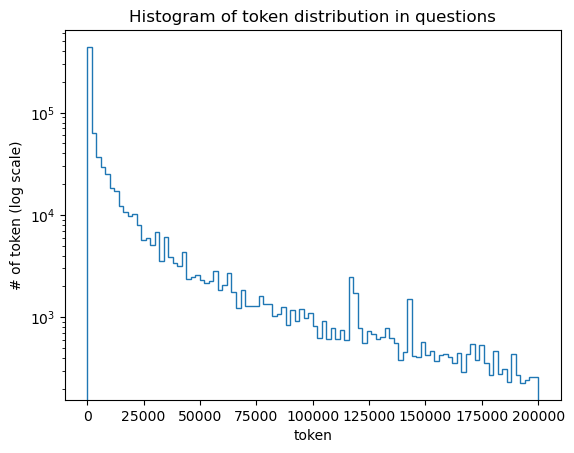

In [28]:
all_questions=df_test['question']
#tokenize_question: list as long as the number of questions.
#the 'list element in position i contains the tokens related to the i th question
tokenize_question=list(all_questions.map(lambda x:tokenize_text(x)))
array_cumulative=plt.hist(np.concatenate(tokenize_question), bins=100,log=True,histtype='step')
plt.title('Histogram of token distribution in questions')
plt.ylabel('# of token (log scale)')
plt.xlabel('token')
plt.show()

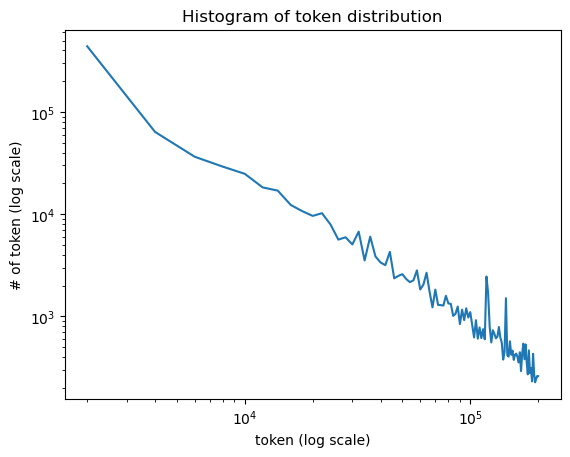

In [29]:
plt.loglog(array_cumulative[1][1:],array_cumulative[0])
plt.title('Histogram of token distribution')
plt.ylabel('# of token (log scale)')
plt.xlabel('token (log scale)')
plt.show()

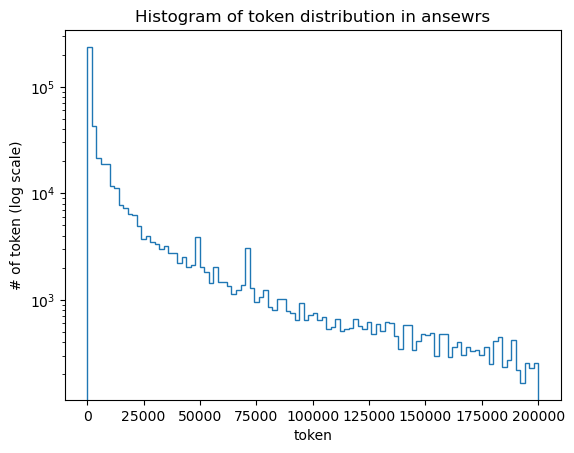

In [30]:
# same as above, but for the columns answers(A,B,C,D) instead of question
all_question_A=df_test['A']
all_question_B=df_test['B']
all_question_C=df_test['C']
all_question_D=df_test['D']

tokenize_question_A=list(all_question_A.map(lambda x:tokenize_text(x)))
tokenize_question_B=list(all_question_B.map(lambda x:tokenize_text(x)))
tokenize_question_C=list(all_question_C.map(lambda x:tokenize_text(x)))
tokenize_question_D=list(all_question_D.map(lambda x:tokenize_text(x)))

tokenize_question_arr_A= np.concatenate(tokenize_question_A)
tokenize_question_arr_B= np.concatenate(tokenize_question_B)
tokenize_question_arr_C= np.concatenate(tokenize_question_C)
tokenize_question_arr_D= np.concatenate(tokenize_question_D)

#Merge the tokens of all answers and show in a histogram 
tokenize_all_question=np.concatenate((tokenize_question_arr_A, tokenize_question_arr_B,tokenize_question_arr_C,tokenize_question_arr_D))
plt.hist(tokenize_all_question, bins=100,log=True,histtype='step')
plt.title('Histogram of token distribution in ansewrs')
plt.ylabel('# of token (log scale)')
plt.xlabel('token')
plt.show()
plt.show()

In [33]:
# C
A_TOKENIZED=tokenize_text('A')[0]
B_TOKENIZED=tokenize_text('B')[0]
C_TOKENIZED=tokenize_text('C')[0]
D_TOKENIZED=tokenize_text('D')[0]

#question_answers_pair_tokenized : list as long as the number of questions.
#the 'list element in position i contains the tokens related to the i th question and answer 'A', 'B' 'C', 'D'
question_answers_pair_tokenized= [q+a+b+c+d for q, a, b, c, d in zip(tokenize_question,
tokenize_question_A,
tokenize_question_B,
tokenize_question_C,
tokenize_question_D
)]

#each list contains at index i the number of occurrences of that token in question-answers pair at row i of database
A_occurrences=[]
B_occurrences=[]
C_occurrences=[]
D_occurrences=[]

#contains at index i the  total number of token in question-answers pair at row i of database
number_of_total_token=[]

#calculate the occurrences of A_TOKENIZED, B_TOKENIZED, C_TOKENIZED,D_TOKENIZED in eaach question-answers pair
for index, pair in enumerate(question_answers_pair_tokenized):
    A_occurrences.append(pair.count(A_TOKENIZED))
    B_occurrences.append(pair.count(B_TOKENIZED))
    C_occurrences.append(pair.count(C_TOKENIZED))
    D_occurrences.append(pair.count(D_TOKENIZED))
    number_of_total_token.append(len(pair))
total_occurrences_A=sum(A_occurrences)
total_occurrences_B=sum(B_occurrences)
total_occurrences_C=sum(C_occurrences)
total_occurrences_D=sum(D_occurrences)
total_occurrences=total_occurrences_A+total_occurrences_B+total_occurrences_C+total_occurrences_D
print("relative distribution:  A_token:  {:.2f}%  B_token:  {:.2f}%,  C_token:  {:.2f}%,  D_token:  {:.2f}%".format( 100* total_occurrences_A/total_occurrences,  100* total_occurrences_B/total_occurrences, 100* total_occurrences_C/total_occurrences, 100* total_occurrences_D/total_occurrences))

relative distribution:  A_token:  79.17%  B_token:  6.02%,  C_token:  10.15%,  D_token:  4.66%


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [34]:
# A

#for each question-answers pair add the nummber of token_A, token_B, token_C , token_D 
#and the total number of token , all the values are calculated abboce

df_test['num_A_token']=A_occurrences
df_test['num_B_token']=B_occurrences
df_test['num_C_token']=C_occurrences
df_test['num_D_token']=D_occurrences
df_test['num_total_token']=number_of_total_token
for index, row in df_test.iterrows():
    #print("num of token A: {}, num of token B: {} , num of token C: {} ,  num of token D: {} ,  num of token: {} ".format(row['num_A_token'] ,row['num_B_token'] ,row['num_C_token'] ,row['num_D_token'], row['num_total_token']))
    pass

#group by correct answer
df_test_answer=df_test.groupby('answer')[['num_A_token', 'num_B_token', 'num_C_token','num_D_token', 'num_total_token']].agg(['mean'])
#rename columns for bettere visualizationss
df_test_answer.columns = ['frequency_token_A', 'frequency_token_B', 'frequency_token_C', 'frequency_token_D', 'mean_total_tokens']

df_test_answer


,frequency_token_A,frequency_token_B,frequency_token_C,frequency_token_D,mean_total_tokens
answer,,,,,
A,0.243017,0.018932,0.025140,0.013035,93.187151
B,0.231947,0.019642,0.029463,0.012709,88.846332
C,0.226410,0.018984,0.034897,0.015355,92.653825
D,0.242850,0.014566,0.030985,0.014301,92.110169


B. /Discuss:/

Since the frequency of frequency_token_A frequency_token_B frequency_token_C frequency_token_D is the nearly the same regardless the correct answers, we believe they don't influence the response

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [35]:
#add a column corresponding to the number of token contained in the questiomn
df_test['total_token_question']=list(map(lambda x: len(x), tokenize_question))

#add a column exceed_max, the value if true if the number of token in that question-answers pair exceeds the limit
df_test['exceed_max']=df_test['num_total_token']>300

#add a column question_exceed_max, the value if true if the number of token in the question only exceeds the limit
df_test['question_exceed_max']=df_test['total_token_question']>300

#group by subject and show how many question-answers pair exceed the limit buy sum exceed_max value
df_test_subject=df_test.groupby('subject')[['exceed_max', 'question_exceed_max']].agg(['sum'])
df_test_subject.columns = ['#_question_answers_exceed', '#_question_exceed']

df_test_subject[df_test_subject['#_question_answers_exceed']>0]

,#_question_answers_exceed,#_question_exceed
subject,,
college medicine,5,5
high school computer science,1,0
high school european history,93,66
high school statistics,1,0
high school us history,85,46
high school world history,122,92
professional law,315,113
professional medicine,14,8
security studies,4,0


B. /Dicsuss:/

The best strategy is to use the fast model for all subjects that have short questions and answer, while the old slower model is necessary for subject that have a significant percentage of long answers and questions. The number of questions and answers that exceed the 300 tokens must be therefore confronted with the total number of questions to fully understand the relevance of those questions. If the percentage is very slow and we can afford to lose some accuracy, the government could think about dropping some questions/answers (this strictly depends on the requirements of the model)

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. For a correct analysis, data must be cleaned and tested, and models should be balanced to have an accurate view. 'Not Sure' answers or similar should be taken into account to get a full evaluation of a model.

2. To get an accurate evaluation of the models, it is important to do testing on different datasets as shown in point 2.1 B)

3. 

4. Use different models based on the requirements of the data. i.e. use the fast model for subjects that don't require long questions and answers, and the slower one only when it's needed.